## Importing modules

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Description of data

#### Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

#### Content

Attribute Information:
1. age
1. sex (1 = male; 0 = female)
1. chest pain type (4 values)
1. resting blood pressure
1. serum cholestoral in mg/dl
1. fasting blood sugar > 120 mg/dl
1. resting electrocardiographic results (values 0,1,2)
1. maximum heart rate achieved
1. exercise induced angina
1. oldpeak = ST depression induced by exercise relative to rest
1. the slope of the peak exercise ST segment
1. number of major vessels (0-3) colored by flourosopy
1. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
1. target: 0 = has heart disease, 1 = no heart disease

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

## Read the data

In [31]:
df = pd.read_csv('../data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Adding column for stick state for clarity (another type of onehot)

In [32]:
df['sick state'] = df.target.apply(lambda x: 'sick' if x == 0 else 'healthy')

## Main stats of data

In [33]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    int64  
 1   sex         303 non-null    int64  
 2   cp          303 non-null    int64  
 3   trestbps    303 non-null    int64  
 4   chol        303 non-null    int64  
 5   fbs         303 non-null    int64  
 6   restecg     303 non-null    int64  
 7   thalach     303 non-null    int64  
 8   exang       303 non-null    int64  
 9   oldpeak     303 non-null    float64
 10  slope       303 non-null    int64  
 11  ca          303 non-null    int64  
 12  thal        303 non-null    int64  
 13  target      303 non-null    int64  
 14  sick state  303 non-null    object 
dtypes: float64(1), int64(13), object(1)
memory usage: 35.6+ KB


In [35]:
df.shape

(303, 15)

## Clean the data

### remove duplicates

In [36]:
df = df.drop_duplicates()
df.shape

(302, 15)

In [37]:
# we see that a line was dropped

### checking for nulls

In [38]:
# there are no nulls
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
sick state    0
dtype: int64

## Correlation

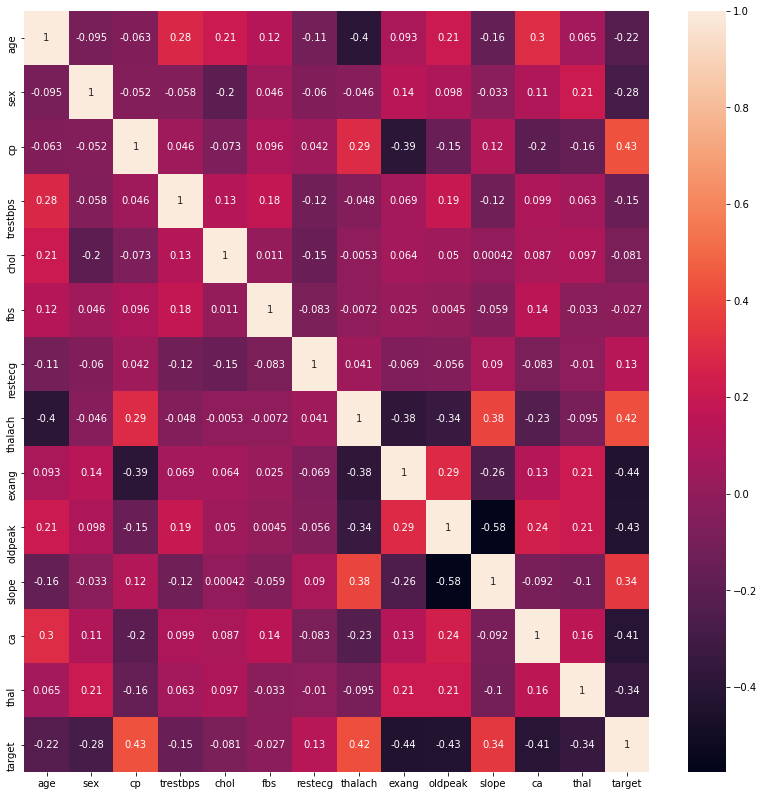

In [39]:
corr = df.corr()
plt.figure(figsize = (14,14))
sns.heatmap(corr, annot=True);

In [40]:
# target and cp have highest correlation of 0.43

### Relationships between attributes

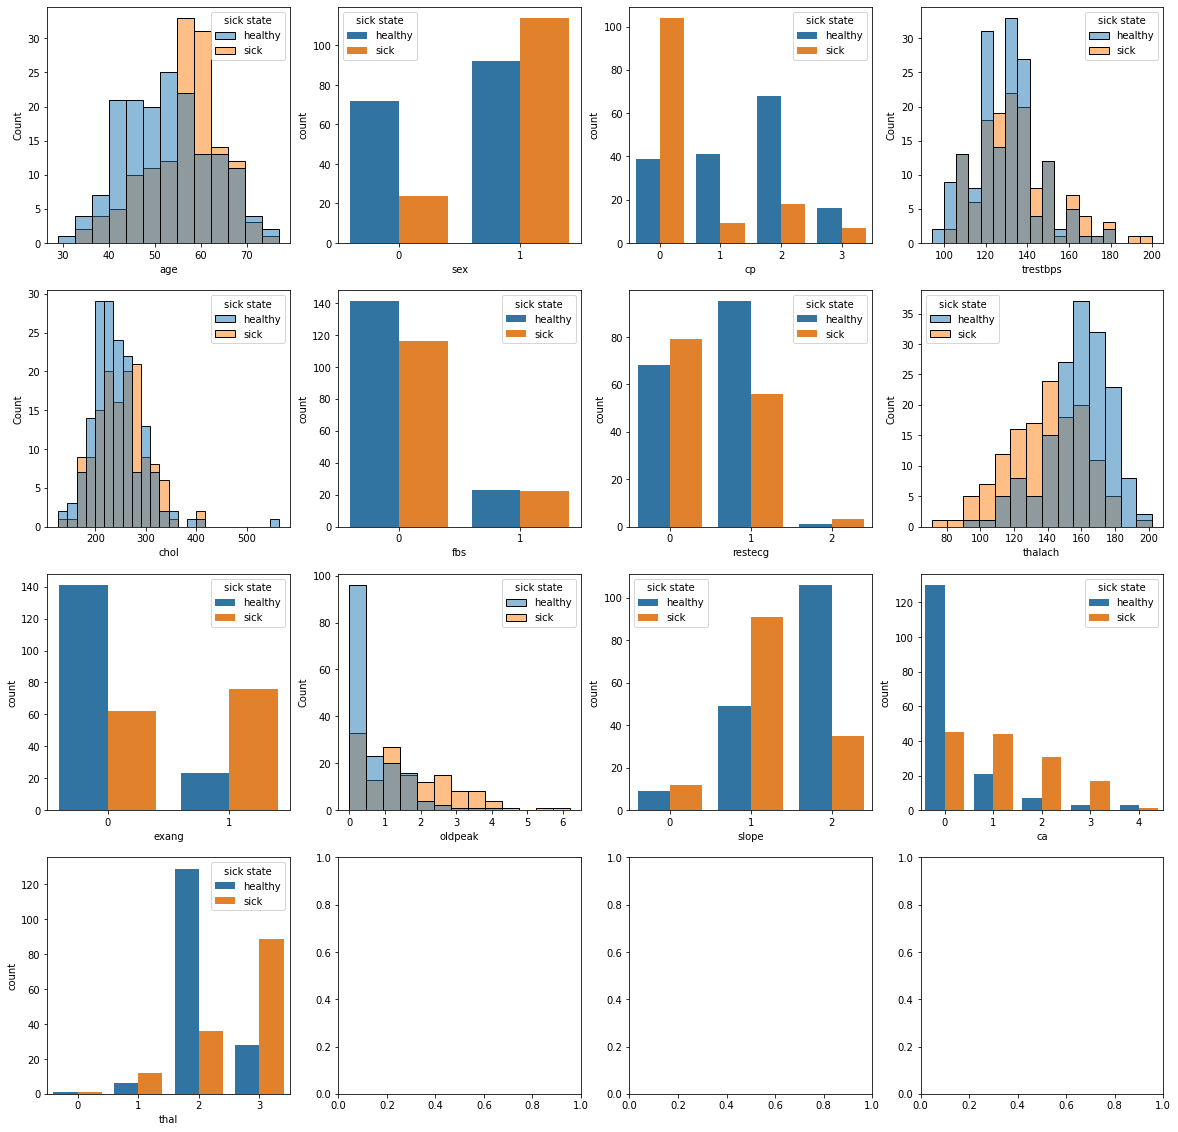

In [41]:
fig, axes = plt.subplots(4, 4, figsize=(20,20))
sns.histplot(x='age',hue='sick state',data=df,ax=axes[0,0])
sns.countplot(x='sex',hue='sick state',data=df,ax=axes[0,1])
sns.countplot(x='cp',hue='sick state',data=df,ax=axes[0,2])
sns.histplot(x='trestbps',hue='sick state',data=df,ax=axes[0,3])
sns.histplot(x='chol',hue='sick state',data=df,ax=axes[1,0])
sns.countplot(x='fbs',hue='sick state',data=df,ax=axes[1,1])
sns.countplot(x='restecg',hue='sick state',data=df,ax=axes[1,2])
sns.histplot(x='thalach',hue='sick state',data=df,ax=axes[1,3])
sns.countplot(x='exang',hue='sick state',data=df,ax=axes[2,0])
sns.histplot(x='oldpeak',hue='sick state',data=df,ax=axes[2,1])
sns.countplot(x='slope',hue='sick state',data=df,ax=axes[2,2])
sns.countplot(x='ca',hue='sick state',data=df,ax=axes[2,3])
sns.countplot(x='thal',hue='sick state',data=df,ax=axes[3,0])
plt.show()

The plots show some relationships:
- Heart diseases is most frequent between the age of 55 to 70. This makes sense as people get sick as they get older. The frequency drops at around 70, as unfoutenately some people pass away from heart disease or otherwise.
- Heart disease is more common in males.
- fbs (fasting blood sugar > 120 mg/dl) plot shows that more people have heart disease when fbs is lower.
- other relationships of data can also be produced from the above plots.

## Skew & Normalization

### Histogram of attributes

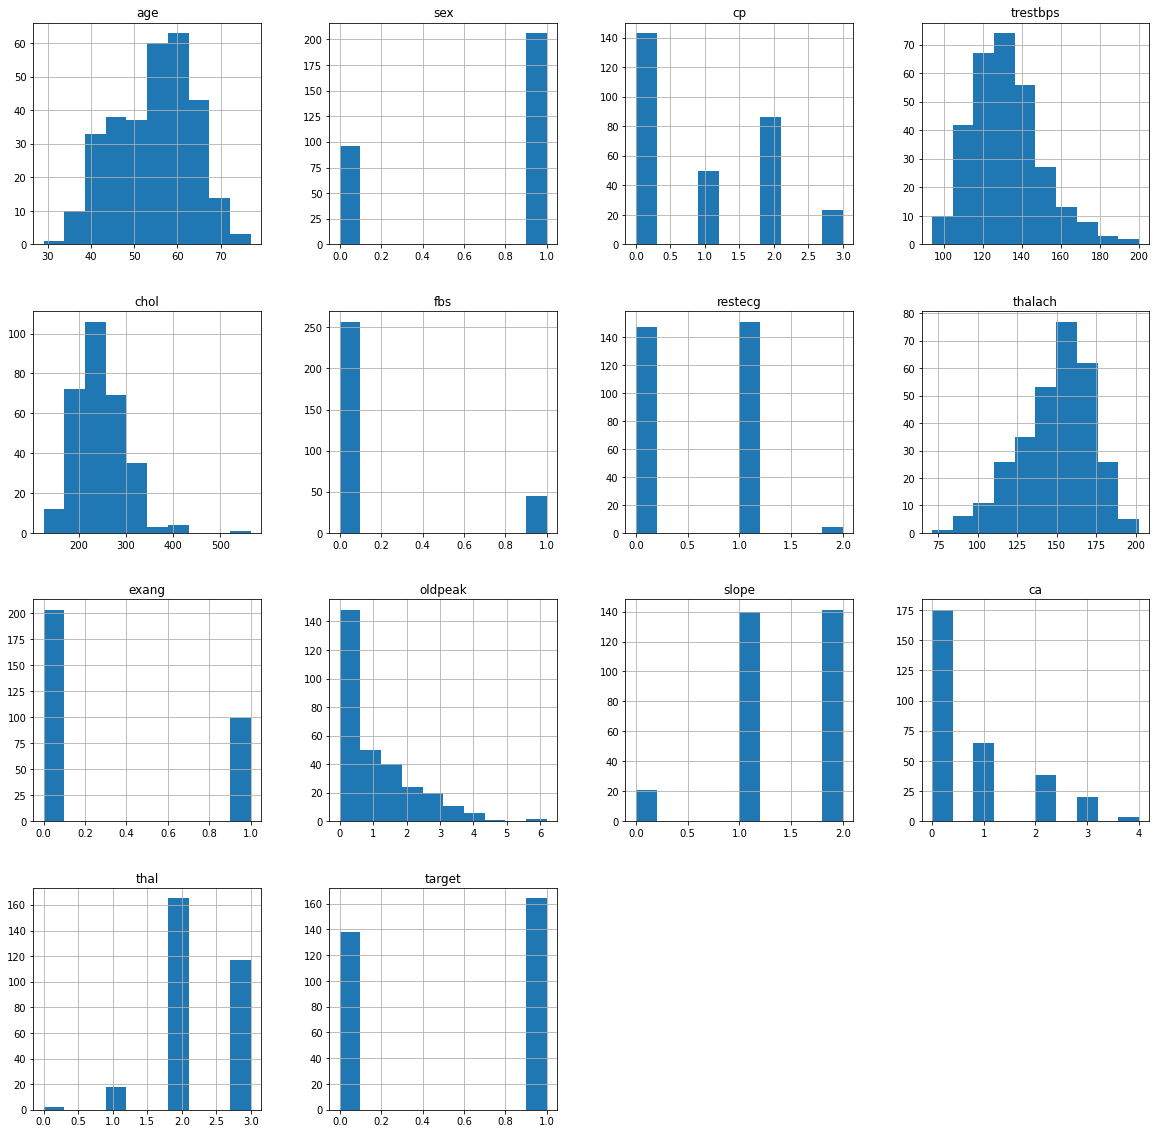

In [37]:
df.hist(figsize=(20,20))
plt.show()

Main conclusions:
- The data contains over twice as much data on males then on females.
- The data contains much more patients with `fbs = 0` over `fbs = 1`

### Normalization- normalize the cholesterol with different methods

Colesterol is skewed, we will normalize it (won't actually save it)

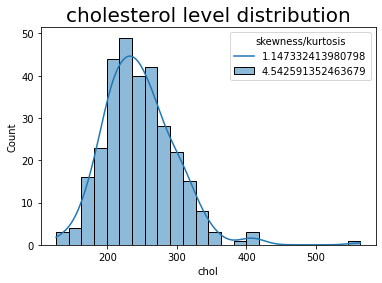

In [45]:
sns.histplot(df.chol, kde=True)
plt.title("cholesterol level distribution",fontsize=20)
plt.legend([df.chol.skew(),df.chol.kurt()],title=("skewness/kurtosis"))
plt.show()

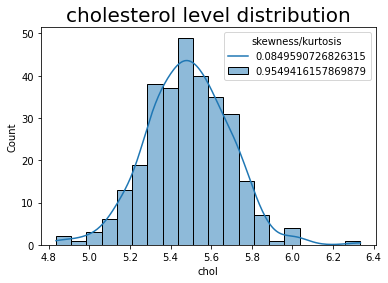

In [46]:
normalized_chol = df.chol.apply(lambda x: np.log(x) if x > 0 else 0)
sns.histplot(normalized_chol, kde=True)
plt.title("cholesterol level distribution",fontsize=20)
plt.legend([normalized_chol.skew(),normalized_chol.kurt()],title=("skewness/kurtosis"))
plt.show()

### Z-Score normalization

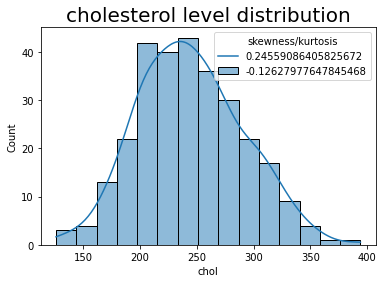

In [56]:
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_z_score = df[filtered_entries]
normalized_chol = df_z_score.chol
sns.histplot(normalized_chol, kde=True)
plt.title("cholesterol level distribution",fontsize=20)
plt.legend([normalized_chol.skew(),normalized_chol.kurt()],title=("skewness/kurtosis"))
plt.show()

### unit length normalization

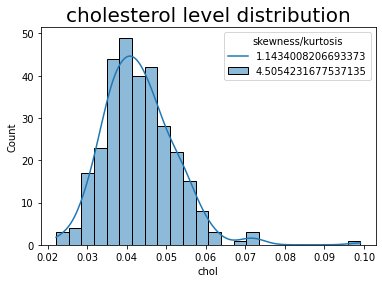

In [57]:
norm = np.linalg.norm(df)
df_normal = df/norm
sns.histplot(df_normal.chol, kde=True)
plt.title("cholesterol level distribution",fontsize=20)
plt.legend([df_normal.chol.skew(),df_normal.chol.kurt()],title=("skewness/kurtosis"))
plt.show()

### min-max normalization

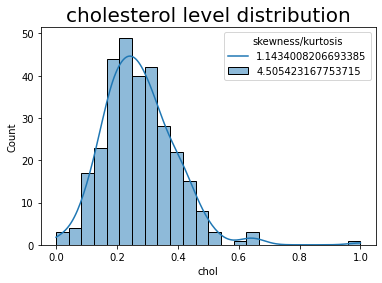

In [61]:
df_min_max = (df - np.min(df))/(np.max(df)- np.min(df))
sns.histplot(df_min_max.chol, kde=True)
plt.title("cholesterol level distribution",fontsize=20)
plt.legend([df_min_max.chol.skew(),df_min_max.chol.kurt()],title=("skewness/kurtosis"))
plt.show()

## Outliers

### 3 standard division away from the mean

In [136]:
outlier1 = df.to_dict()
for col in df.columns:
    outlier1[col] = df[(np.abs(df[col] - df[col].mean())/df[col].std()) <= 3][col]

df_outlier1 = pd.DataFrame.from_dict(outlier3)
df_outlier1.isnull().sum()

age         16
sex         16
cp          16
trestbps    14
chol        12
fbs         16
restecg     16
thalach     15
exang       16
oldpeak     14
slope       16
ca          11
thal        14
target      16
dtype: int64

- Cholestrol and others have outliers relevant for excluding or averaging out (by median for example)
- Of course not all relevant for outliers, such as sex

### 3 MAD away for the median

In [138]:
# mad_arr = np.median([np.abs(x - np.median(arr)) for x in arr])
# mad_arr
# outlier2 = [x for x in arr if np.abs(x - np.mean(arr))/mad_arr > 3]
# outlier2
outlier2 = df.to_dict()
for col in df.columns:
    arr = df[col]
    mad_arr = np.median([np.abs(x - np.median(arr)) for x in arr])
    outlier2[col] = df[(np.abs(df[col] - df[col].mean())/mad_arr) <= 3][col]

df_outlier2 = pd.DataFrame.from_dict(outlier3)
df_outlier2.isnull().sum()

age         16
sex         16
cp          16
trestbps    14
chol        12
fbs         16
restecg     16
thalach     15
exang       16
oldpeak     14
slope       16
ca          11
thal        14
target      16
dtype: int64

- Cholestrol and others have outliers relevant for excluding or averaging out (by median for example)
- Of course not all relevant for outliers, such as sex

### Quantiles

In [103]:
q75 = df.quantile(0.75)
q25 = df.quantile(0.25)

In [102]:
upper = 2*q75 - q25
lower = q75 - 2 * q25

In [132]:
outlier3 = df.to_dict()
for col in df.columns:
    outlier3[col] = df[(df[col] > lower[col]) & (df[col] < upper[col])][col]

df_outlier3 = pd.DataFrame.from_dict(outlier3)
df_outlier3.isnull().sum()

age           2
sex         303
cp          280
trestbps     26
chol         11
fbs         303
restecg     303
thalach       1
exang       303
oldpeak     248
slope        21
ca          303
thal          0
target      303
dtype: int64

- Cholestrol has outliers relevant for excluding or averaging out (by median for example)
- There are other columns relevant as well

## Interesting sub-groups

In [42]:
def plotGraph(df):
    fig, axes = plt.subplots(4, 4, figsize=(20,20))
    sns.histplot(x='age',hue='sick state',data=df,ax=axes[0,0])
    sns.countplot(x='sex',hue='sick state',data=df,ax=axes[0,1])
    sns.countplot(x='cp',hue='sick state',data=df,ax=axes[0,2])
    sns.histplot(x='trestbps',hue='sick state',data=df,ax=axes[0,3])
    sns.histplot(x='chol',hue='sick state',data=df,ax=axes[1,0])
    sns.countplot(x='fbs',hue='sick state',data=df,ax=axes[1,1])
    sns.countplot(x='restecg',hue='sick state',data=df,ax=axes[1,2])
    sns.histplot(x='thalach',hue='sick state',data=df,ax=axes[1,3])
    sns.countplot(x='exang',hue='sick state',data=df,ax=axes[2,0])
    sns.histplot(x='oldpeak',hue='sick state',data=df,ax=axes[2,1])
    sns.countplot(x='slope',hue='sick state',data=df,ax=axes[2,2])
    sns.countplot(x='ca',hue='sick state',data=df,ax=axes[2,3])
    sns.countplot(x='thal',hue='sick state',data=df,ax=axes[3,0])
    plt.show()

In [95]:
def healthy_vs_sick(df, group):
    return df['sick state'].value_counts().sort_index(), df[group]['sick state'].value_counts().sort_index()

In [94]:
def healthy_vs_sick_normalized(df, group):
    return df['sick state'].value_counts(normalize=True), df[group]['sick state'].value_counts(normalize=True)

### Group1- people between the ages of 55 to 70.

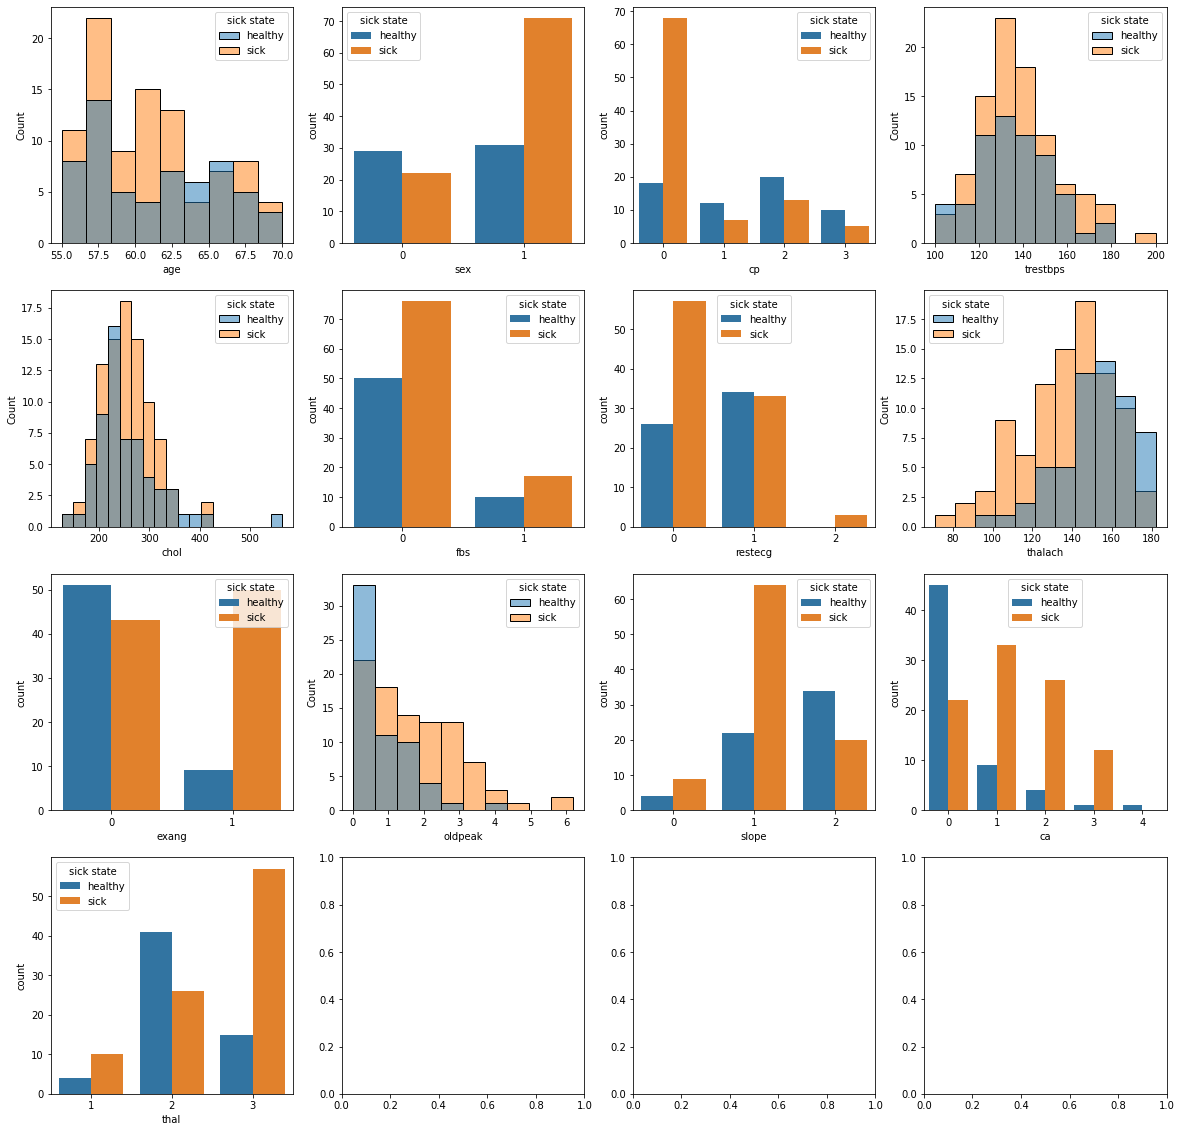

In [56]:
group = group1 = (df.age >= 55) & (df.age <= 70)
plotGraph(df[group])

In [96]:
# sick VS healthy before and after the group filtering
healthy_vs_sick(df, group)

(healthy    164
 sick       138
 Name: sick state, dtype: int64,
 healthy    141
 sick       116
 Name: sick state, dtype: int64)

In [97]:
# sick VS healthy normalized before and after the group filtering
healthy_vs_sick_normalized(df, group)

(healthy    0.543046
 sick       0.456954
 Name: sick state, dtype: float64,
 healthy    0.548638
 sick       0.451362
 Name: sick state, dtype: float64)

Group1 contains more sick people, but still many healty 

### Group2- people with restecg=0 (showing probable or definite left ventricular hypertrophy by Estes' criteria).

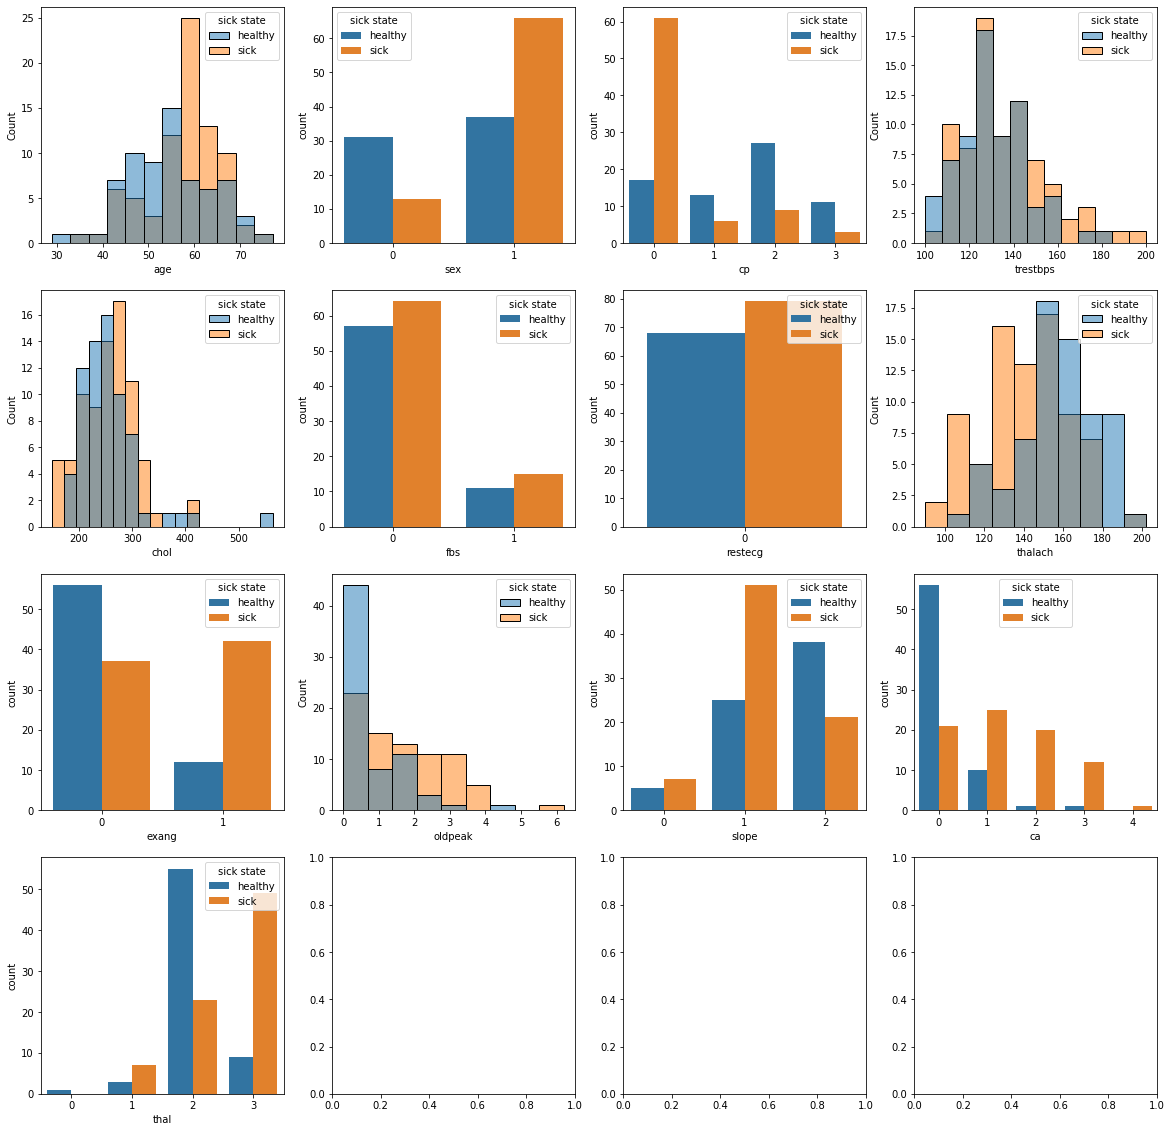

In [98]:
group = group2 = df.restecg == 0
plotGraph(df[group])

In [99]:
# sick VS healthy before and after the group filtering
healthy_vs_sick(df, group)

(healthy    164
 sick       138
 Name: sick state, dtype: int64,
 healthy    68
 sick       79
 Name: sick state, dtype: int64)

In [100]:
# sick VS healthy normalized before and after the group filtering
healthy_vs_sick_normalized(df, group)

(healthy    0.543046
 sick       0.456954
 Name: sick state, dtype: float64,
 sick       0.537415
 healthy    0.462585
 Name: sick state, dtype: float64)

Group2 doesn't improve the model by itself

### Group3- people with restecg=0 (showing probable or definite left ventricular hypertrophy by Estes' criteria).

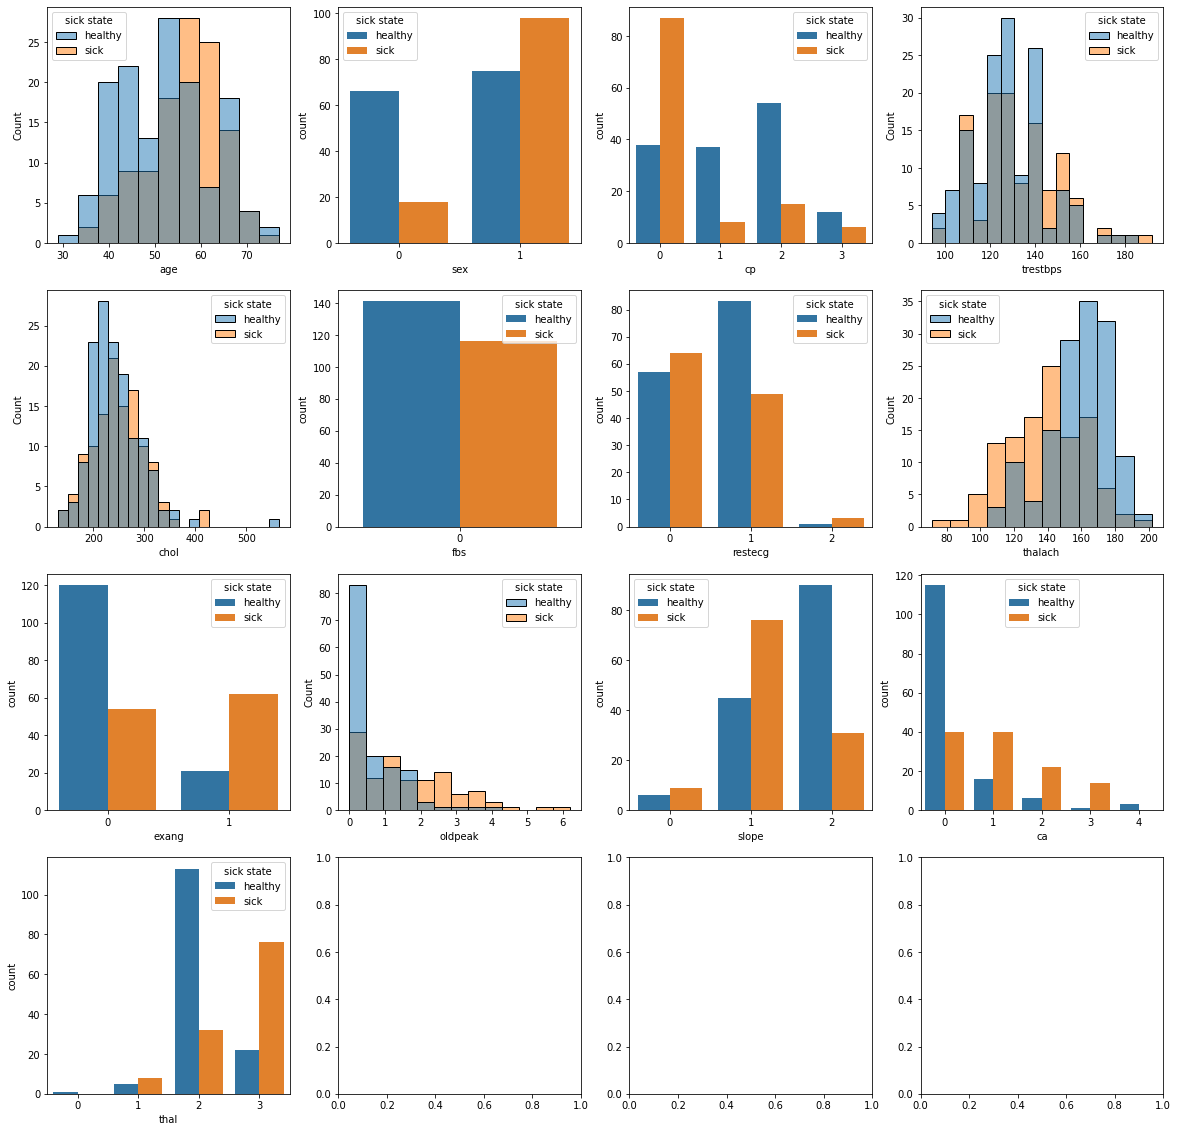

In [107]:
group = group3 = df.fbs == 0
plotGraph(df[group])

In [108]:
# sick VS healthy before and after the group filtering
healthy_vs_sick(df, group)

(healthy    164
 sick       138
 Name: sick state, dtype: int64,
 healthy    141
 sick       116
 Name: sick state, dtype: int64)

In [109]:
# sick VS healthy normalized before and after the group filtering
healthy_vs_sick_normalized(df, group)

(healthy    0.543046
 sick       0.456954
 Name: sick state, dtype: float64,
 healthy    0.548638
 sick       0.451362
 Name: sick state, dtype: float64)

Group3 doesn't improve the model by itself

### Group4- combined all previous sub groups

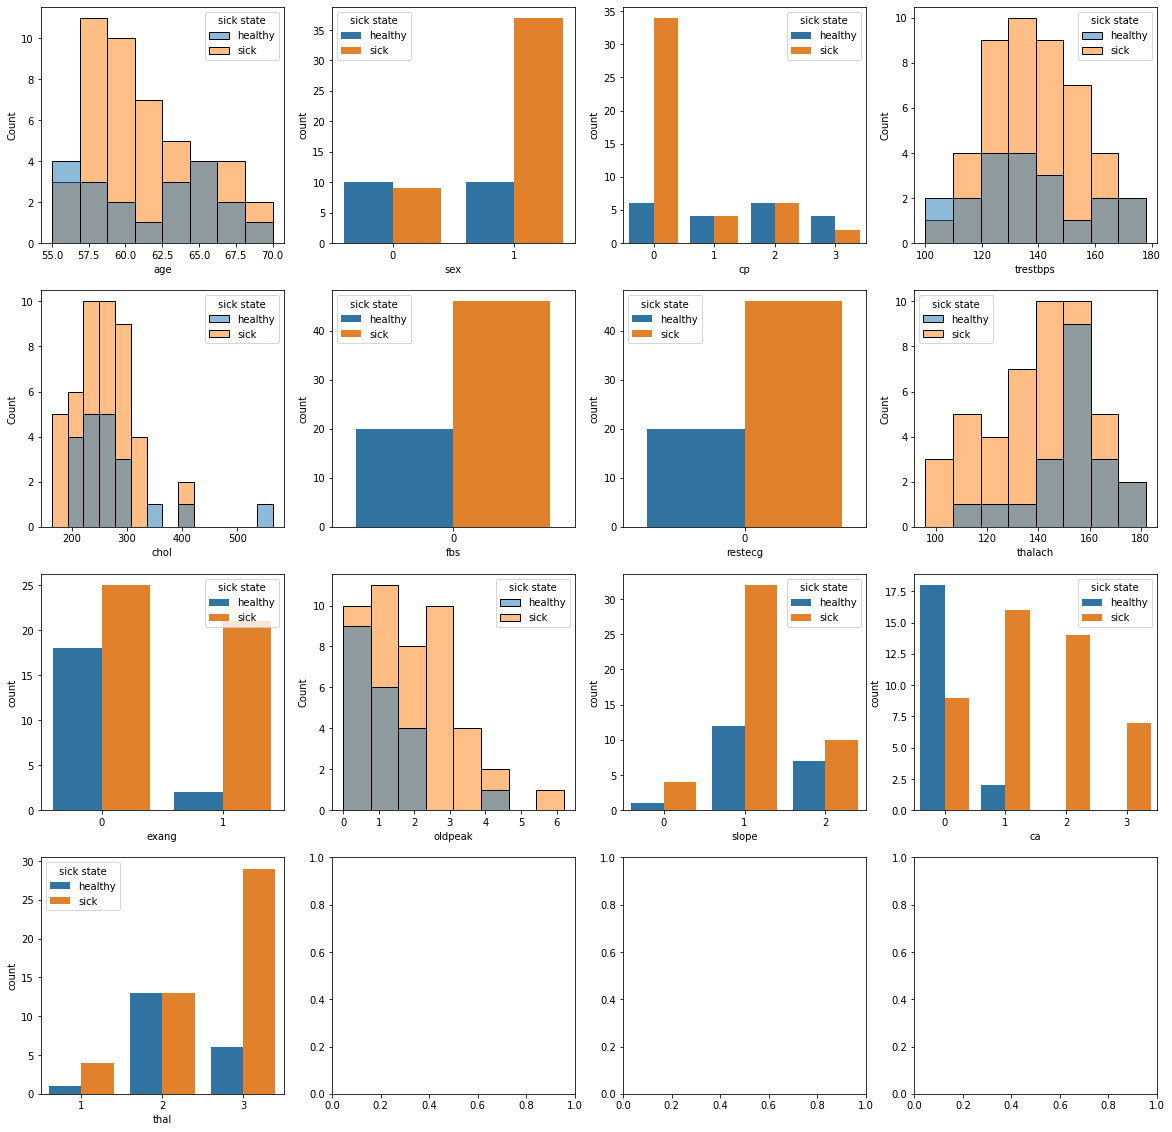

In [110]:
group = group4 = group1 & group2 & group3
plotGraph(df[group])

In [111]:
# sick VS healthy before and after the group filtering
healthy_vs_sick(df, group)

(healthy    164
 sick       138
 Name: sick state, dtype: int64,
 healthy    20
 sick       46
 Name: sick state, dtype: int64)

In [112]:
# sick VS healthy normalized before and after the group filtering
healthy_vs_sick_normalized(df, group)

(healthy    0.543046
 sick       0.456954
 Name: sick state, dtype: float64,
 sick       0.69697
 healthy    0.30303
 Name: sick state, dtype: float64)

Even though percentage wise this model finds more sick people than healthy, it still misses out on many sick people.

# Conclusion

- There is much more analysis which can be done. Such as finding a better model/sub groups, 